In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
np.random.seed(1)

<h2>Kernel density plot</h2>

In [ ]:
plt.close("all")
df = pd.DataFrame([
    np.random.normal(0,1,1000)
    ,np.random.normal(5,2,1000)       
])
df = df.T
df.columns = ['first', 'second']


v3 = np.concatenate((df['first'], df['second']))
fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(v3, hist_kws = {'color': 'Teal'}, kde_kws = {'color': 'Navy'}, ax = ax)
fig

<h2>Different joint plots</h2>

In [ ]:
# Seaborn joint plot is a figure level function, resulting in a seaborn
# grid object that cannot be passed into axes of existing figure

plt.close("all")
df = pd.DataFrame([
    np.random.normal(0,1,1000)
    ,np.random.normal(5,2,1000)       
])
df = df.T
df.columns = ['first', 'second']

# Notmal joint plot
grid = sns.jointplot(df['first'],df['second'], alpha = 0.3)
# access and tweak grid subplots 
grid.ax_joint.set_aspect('equal')

# Hex plot
grid2 = sns.jointplot(df['first'],df['second'], alpha = 0.8, kind = 'hex')

# kde joint plot
grid3 = sns.jointplot(df['first'],df['second'], alpha = 0.8, kind = 'kde', space = 0)

plt.show()

<h2>Pair plot</h2>

In [ ]:
plt.close("all")
df = pd.DataFrame([
     np.random.normal(0,1,1000)
    ,np.random.normal(5,2,1000)
    ,np.random.normal(-2,8,1000)    
])
df = df.T
df['name'] = ['name1']*333 + ['name2']*333 + ['name3']*334
df.columns = ['first', 'second', 'third','name']
df.head()

fig1 = sns.pairplot(df, hue = 'name')
plt.show()

fig2 = sns.pairplot(df, hue = 'name', diag_kind = 'kde')
plt.show()

<h2>Box/violin/swarm plots</h2>

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


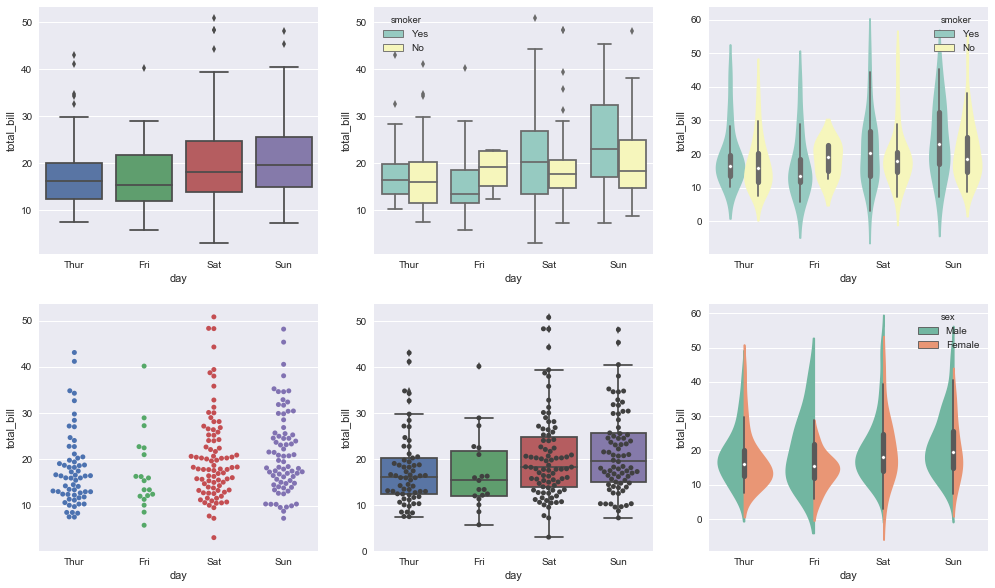

In [45]:
plt.close("all")
tips = sns.load_dataset("tips")
display(tips.head())

fig, axes = plt.subplots(nrows = 2, ncols = 3)
fig.set_size_inches(17, 10)

sns.boxplot(x = "day", y = "total_bill", data = tips, ax = axes[0,0])
sns.boxplot(x = "day", y = "total_bill", hue = "smoker", data = tips, ax = axes[0,1], palette = 'Set3')
sns.violinplot(x = "day", y = "total_bill", hue = "smoker", data = tips, ax = axes[0,2], palette = 'Set3')
sns.swarmplot(x = "day", y = "total_bill", data = tips, ax = axes[1,0])
sns.boxplot(x = "day", y = "total_bill", data = tips, ax = axes[1,1])
sns.swarmplot(x = "day", y = "total_bill", data = tips, color=".25", ax = axes[1,1])
sns.violinplot(x="day", y="total_bill", hue="sex",data=tips, palette="Set2", split=True,scale="count", ax = axes[1,2])

fig

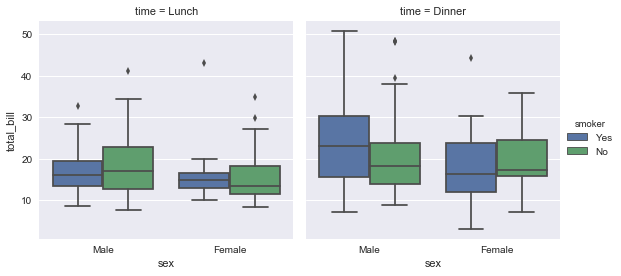

In [40]:
plt.close("all")
#fig, ax = plt.subplots(nrows = 1, ncols = 1)
sns.factorplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="box")
#fig
plt.show()

<h2>Facet grids</h2>

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


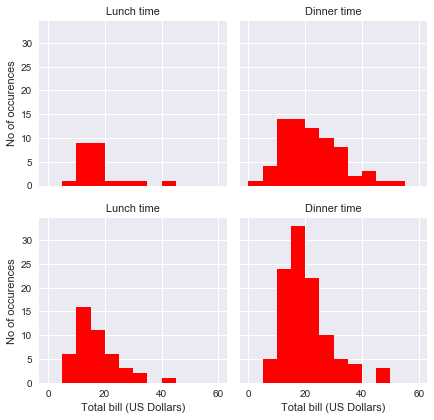

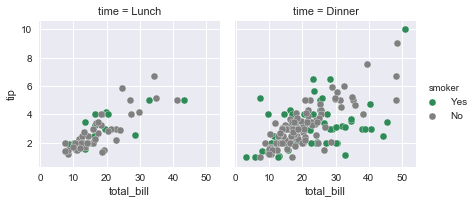

In [72]:
plt.close("all")
tips = sns.load_dataset("tips")
display(tips.head())

bins = np.arange(0, 65, 5)
g = sns.FacetGrid(tips, col = "time", row = "smoker", size = 3, aspect = 1)
g = (g.map(plt.hist, "total_bill", color = 'r', bins = bins)
        .set_titles("{col_name} time")
        .set_axis_labels("Total bill (US Dollars)", "No of occurences")
    )

pal = dict(Yes = "seagreen", No = "gray")
g2 = sns.FacetGrid(tips, col = "time",  hue = "smoker", palette = pal)
g2 = (g2.map(plt.scatter, "total_bill", "tip", edgecolor="w")
          .add_legend())

plt.show()